# Classification of Digits - MNIST

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [66]:
train_data = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download = True)

In [67]:
test_data = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download = True)

In [68]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [69]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [70]:
train_data.data.max()

tensor(255, dtype=torch.uint8)

In [71]:
model = nn.Sequential(
                        nn.Linear(784,128),
                        nn.ReLU(),
                        nn.Linear(128,10)                              
                    )

In [72]:
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [73]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [74]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters())

batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size,shuffle=False)

In [75]:
n_epochs = 10

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):

    train_loss = []

    for inputs,targets in train_loader:
        
        inputs, targets = inputs.to(device), targets.to(device)

        inputs = inputs.view(-1,784)
        
        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, targets)

        loss.backward()

        optimizer.step()

        train_loss.append(loss.item())

    train_loss = np.mean(train_loss)

    test_loss = []

    for inputs, targets in test_loader:

        inputs, targets = inputs.to(device), targets.to(device)

        inputs = inputs.view(-1,784)
        
        outputs = model(inputs)

        loss = criterion(outputs, targets)

        test_loss.append(loss.item())

    test_loss = np.mean(test_loss)

    train_losses[it] = train_loss
    
    test_losses[it] = test_loss

    print(f'Epoch: {it}, Train Loss: {train_loss}, Test Loss: {test_loss}')



Epoch: 0, Train Loss: 0.4228413777946155, Test Loss: 0.23635363063621748
Epoch: 1, Train Loss: 0.20169683325011084, Test Loss: 0.16379969495148222
Epoch: 2, Train Loss: 0.1463966191942885, Test Loss: 0.1279320098412565
Epoch: 3, Train Loss: 0.11516637008772222, Test Loss: 0.11548135396022396
Epoch: 4, Train Loss: 0.09181429608973232, Test Loss: 0.1018109820765455
Epoch: 5, Train Loss: 0.07584882521235359, Test Loss: 0.09092505367861801
Epoch: 6, Train Loss: 0.06337993537713248, Test Loss: 0.08787330094418383
Epoch: 7, Train Loss: 0.05437509758052414, Test Loss: 0.07960147195262834
Epoch: 8, Train Loss: 0.04568783815568889, Test Loss: 0.0789653389461197
Epoch: 9, Train Loss: 0.03943179752518818, Test Loss: 0.07381278099831123


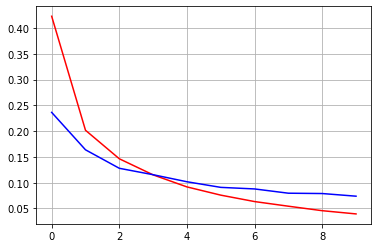

In [87]:
plt.plot(train_losses, color='red', label='Train Loss')
plt.plot(test_losses, color='blue', label='Test Loss')
plt.grid()

In [77]:
n_correct = 0
n_total = 0

for inputs, targets in train_loader:

    inputs = inputs.view(-1,784)
    outputs = model(inputs)
    _, predictions = torch.max(outputs,1)

    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct/n_total


n_correct = 0
n_total = 0

for inputs, targets in test_loader:

    inputs = inputs.view(-1,784)
    outputs = model(inputs)
    _, predictions = torch.max(outputs,1)

    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
test_acc = n_correct/n_total
    
print(f'Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')
   


Train Accuracy: 0.9919, Test Accuracy: 0.9773


In [118]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap = plt.cm.Blues):

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')

    else:
        print('Confusion Matrix Without Normalization')

    print(cm)
    import seaborn as sns
    plt.figure(figsize=(16,8))
    sns.heatmap(cm,annot=True, cmap=cmap)




Confusion Matrix Without Normalization
[[ 969    0    1    1    0    0    4    1    3    1]
 [   0 1121    3    1    0    1    4    1    4    0]
 [   7    0 1001    3    1    1    3    5   10    1]
 [   0    0    8  978    0    7    0    2    6    9]
 [   1    0    1    1  958    0    7    1    2   11]
 [   2    0    0    6    1  876    3    0    3    1]
 [   4    3    1    1    1    5  941    0    2    0]
 [   1    4    9    3    1    0    0  999    3    8]
 [   4    0    0    4    5    3    3    2  949    4]
 [   3    4    0    4    9    2    0    3    3  981]]


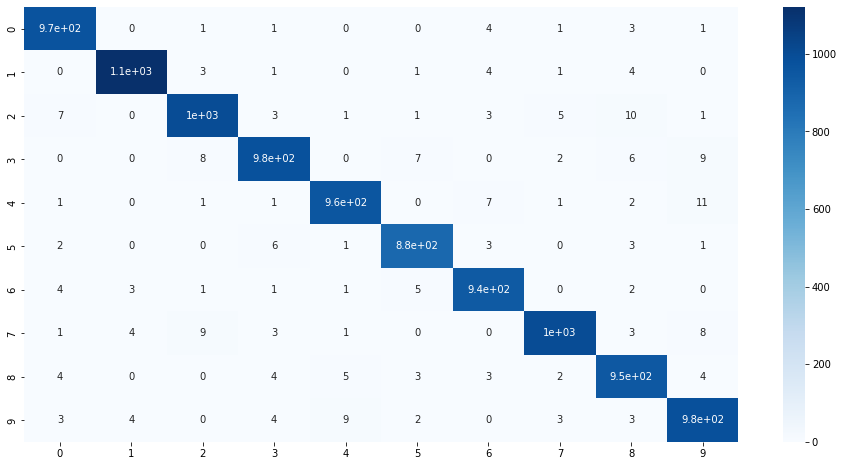

In [119]:
x_test = test_data.data.numpy()

y_test = test_data.targets.numpy()

p_test = np.array([])

for inputs, targets in test_loader:

    inputs = inputs.view(-1,784)

    outputs = model(inputs)
    
    _, predictions = torch.max(outputs, 1)

    p_test = np.concatenate((p_test, predictions.data.numpy()))

cm  = confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm, list(range(10)))



    